In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import plotly.graph_objects as go


In [2]:
filename = "dtsc_data.xlsx"
patients = pd.read_excel(filename)

### Visualizations


The first thing we wanted to look at was if there was a primary cancer

---

site that is more common in smokers than non-smokers.

#### Figure 1

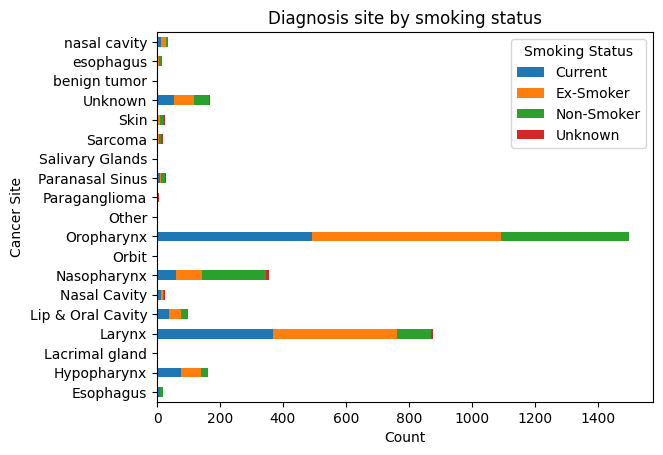

In [3]:
df = patients.groupby('cancer_site').smoking_status.value_counts().unstack()
smokingSite = df.plot(kind='barh',
        stacked=True,
        title='Diagnosis site by smoking status',
        ylabel = "Cancer Site",
        xlabel = "Count");

smokingSite.legend(['Current', 'Ex-Smoker','Non-Smoker', 'Unknown'], title = 'Smoking Status');

In Figure 1 we can see that the most common cancer sites for smokers and ex-smokers are the Oropharynx and the Larynx, while the Nasopharynx is more common in patients who do not smoke.

Then we looked at how likely HPV cells were present in the cancer based on the location site of the cancer.

> Indented block

> Indented block





#### Figure 2

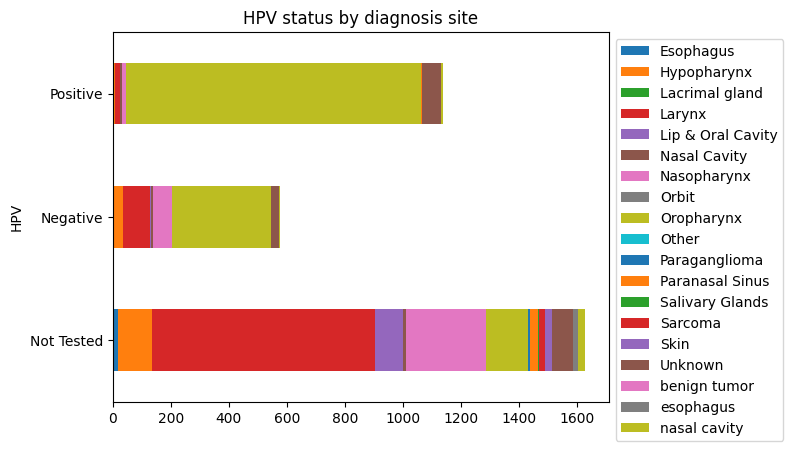

In [4]:
df = patients.groupby('HPV').cancer_site.value_counts().unstack()
hpvSite = df.plot(kind='barh', stacked=True, title='HPV status by diagnosis site')
hpvSite.legend(loc = 'upper left', bbox_to_anchor=(1.0, 1.0))
plt.yticks([0, 1, 2], ['Not Tested', 'Negative', 'Positive']);

Figure 2 shows that patients with HPV most commonly have Oropharyngeal cancer in the oropharynx. This was also true for patients who tested negative for HPV. However, patients who did not test for HPV most commonly had cancer in the Larynx and Nasopharynx.

We also wanted to look at the distribution of treatment types among the patients.

#### Figure 3

In [5]:
# Look at the treatment type column in the date frame
combined_treatment_type_counts = patients['treatment_type'].value_counts()

#Assign colors to each treatment type
adjusted_color_palette = ["#00008B", "#FF4500", "#32CD32", "#FF69B4"]  # Corrected color codes
#Assign descriptions to each treatment type
descriptions = {
    "RT alone": "This represents cases where only Radiation Therapy is used as the treatment method.",
    "ChemoRT": "This represents cases where a combination of Chemotherapy and Radiation Therapy is used for treatment.",  # Corrected key and description
    "RT + EGFRI": "This represents cases where Radiation Therapy is combined with Epidermal Growth Factor Receptor Inhibitor for treatment.",
    "Postop RT alone": "This represents cases where only Postoperative Radiation Therapy is used, typically after a surgical procedure."
}
#Calculate percentage of each treatment type and provide descriptions for each treatment type
labels_with_descriptions = []
for label, count in zip(combined_treatment_type_counts.index, combined_treatment_type_counts):
    pct = 100 * count / combined_treatment_type_counts.sum()  # Percentage
    description = descriptions.get(label, '')  # Matching with description keys
    indented_description = '\n    '.join(textwrap.wrap(description, width=30))
    labels_with_descriptions.append(f"{label} ({pct:.1f}%)\n    {indented_description}.")


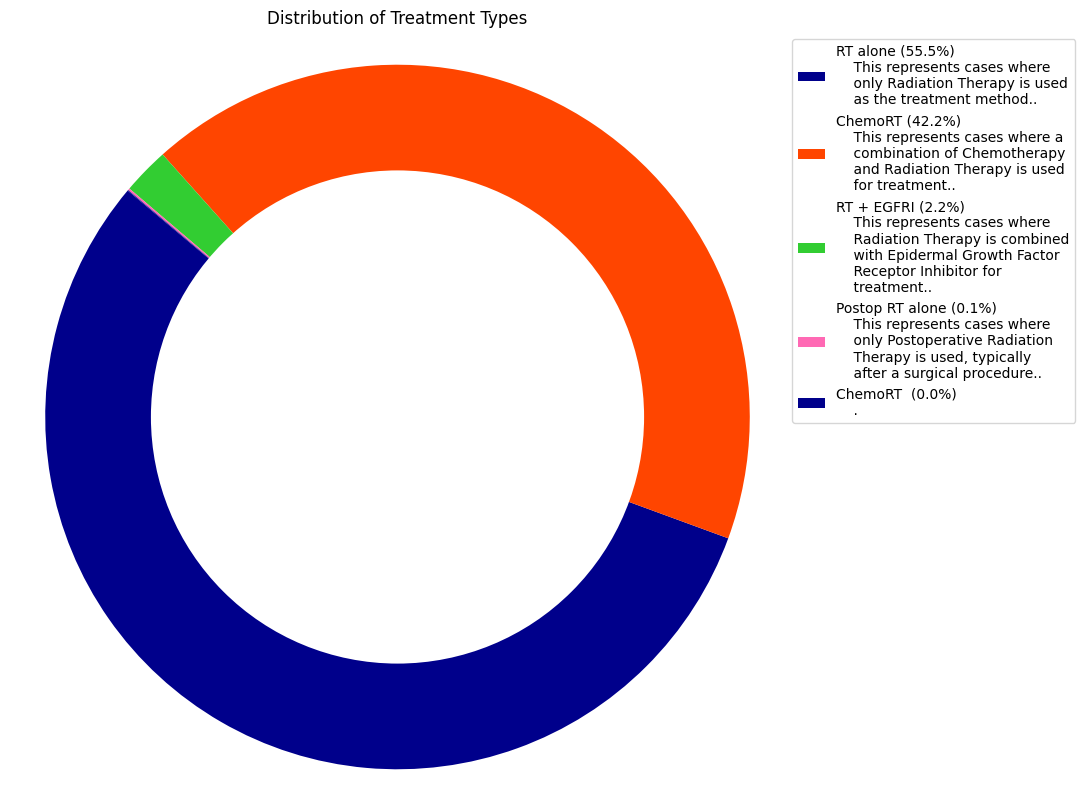

In [6]:
#Create the plot for each treatment type
plt.figure(figsize=(10, 10))
plt.pie(combined_treatment_type_counts, textprops=dict(color="w"), startangle=140, colors=adjusted_color_palette, wedgeprops=dict(width=0.4))
plt.gca().add_artist(plt.Circle((0, 0), 0.70, fc='white'))
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), labels=labels_with_descriptions)
plt.title('Distribution of Treatment Types')
plt.axis('equal')
plt.show()



```
# This is formatted as code
```

Figure 3 shows that the majority of treaments use only radiation therapy (55.5%). However, there is also a large number of patients who receive chemotherapy along with the radiation therapy (42.2%).

We then took this a step further and looked at how often each treatment type is used based on the site of the cancer.  

#### Figure 4

In [7]:
#Set up
patients['treatment_type'] = patients['treatment_type'].str.rstrip()
ct = pd.crosstab(patients['cancer_site'], patients['treatment_type'])
ct_filtered = ct[ct.sum(axis=1) >= 100]
ct_filtered = ct_filtered.drop(index='Unknown', errors='ignore')
ct_filtered.loc['Total'] = ct_filtered.sum(axis=0)
ct_normalized_filtered = ct_filtered.div(ct_filtered.sum(axis=1), axis=0) * 100
ct_normalized_filtered


treatment_type,ChemoRT,Postop RT alone,RT + EGFRI,RT alone
cancer_site,,,,
Hypopharynx,37.037037,0.617284,4.320988,58.024691
Larynx,10.832383,0.114025,1.026226,88.027366
Lip & Oral Cavity,21.000000,0.000000,5.000000,74.000000
Nasopharynx,87.887324,0.000000,0.000000,12.112676
Oropharynx,51.565623,0.000000,3.197868,45.236509
Total,42.136895,0.066778,2.303840,55.492487


In [8]:
# colors
colors_dict = {
    'RT alone': 'black',
    'RT + EGFR': 'red',
    'RT + ICI': 'purple',
    'RT + Other': 'yellow',
}

# Create figure
fig = go.Figure()

fig = go.Figure()

for treatment_type, color in zip(ct_normalized_filtered.columns, colors_dict.values()):
    fig.add_trace(go.Bar(
        y=[f"{index} (Patients: {ct_filtered.loc[index].sum()})" for index in ct_normalized_filtered.index],
        x=ct_normalized_filtered[treatment_type],
        name=treatment_type,
        orientation='h',
        marker_color=color
    ))

fig.update_layout(
    barmode='stack',
    title_text='How Different Treatments Are Used for Each Cancer Type (Minimum of 100 patients)',
    title_font_size=14,
    xaxis_title_text='Percentage (%)',
    xaxis_title_font_size=12,
    yaxis_title_text='Cancer Site',
    yaxis_title_font_size=12,
    font_size=10,
    legend_title_text='Treatment Type',
    legend_title_font_size=10,
    legend_font_size=8,
)

fig.show()

[link text](https://)Figure 4 shows that over half the patients with cancer in the oropharynx are treated with both radiation therapy and chemotherapy, but there is also a large amount of patients with cancer in the oropharynx who receive only radiation therapy. However, in the larynx the majority of patients receive only radiation therapy.

Next we looked at the success rate of the treatment indicated by a relapse. There are two kinds of relapse that a patient can have: local and regional. A local relapse occurs when the patient has cancer in the same site as the first time they had cancer. A regional relapse occurs when the patient develops cancer in areas around the original cancer site. We decided to look into if relapse was common among patients with or without HPV for both local and regional relapse.

#### Figure 5

In [9]:
df = patients

In [10]:
alive = ['Alive', 'alive']
mask = df['Status'].isin(alive)
alive_patients = df[mask]

In [11]:
# Focus only on treatment type and local relapse
local = alive_patients.groupby('Local').treatment_type.value_counts().unstack()
#fill null values with 0
local = local.fillna(0)
local = local.transpose()

In [12]:
local = pd.DataFrame(local)
local = (local/2287)*100

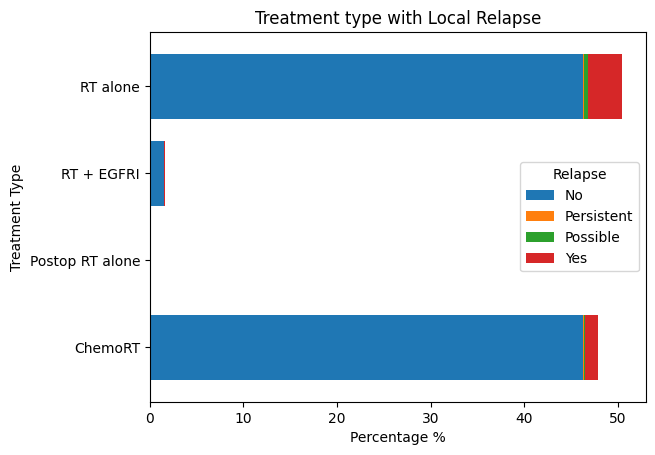

In [13]:
# Create the bar graph
local_relapse = local.plot(kind = 'barh',
                           stacked = True,
                           width = 0.75,
                           xlabel = 'Percentage %',
                           ylabel = 'Treatment Type',
                           title = 'Treatment type with Local Relapse')
local_relapse.legend(['No', 'Persistent','Possible', 'Yes'], title = 'Relapse');

In Figure 5, we can see that relapse was most common among patients who were only treated with radiotherapy. However, overall local relapse did not occur the majority of the time.

#### Figure 6

In [14]:
# Percentages of patients who had the cancer return Regionally
regional = alive_patients.groupby('Regional').treatment_type.value_counts().unstack()
# Fill null values with 0
regional = regional.fillna(0)
regional = regional.transpose()

In [15]:
# Finds the percentage of regional relapse
regional = pd.DataFrame(regional)
regional = (regional/2287)*100

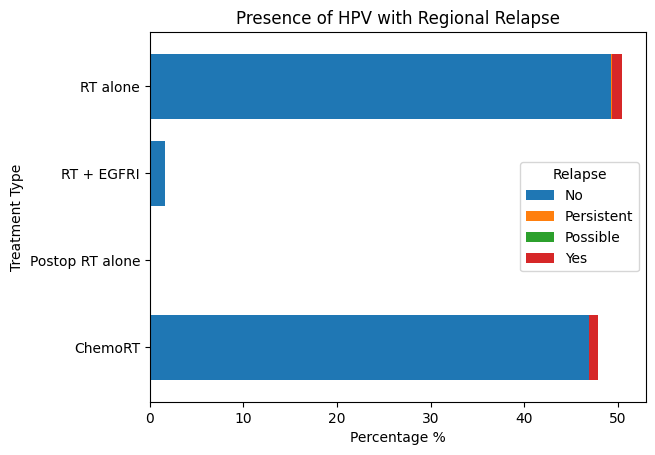

In [16]:
reg_relapse = regional.plot(kind = 'barh',
                           stacked = True,
                           width = 0.75,
                           xlabel = 'Percentage %',
                            ylabel = 'Treatment Type',
                            title = 'Presence of HPV with Regional Relapse')
reg_relapse.legend(['No', 'Persistent','Possible', 'Yes'], title = 'Relapse')

Figure 6 shows that regional relapse is not very common with any of the treatment types. Compared to Figure 5, we can observe that regional relapse is less common than local relapse.